In [ ]:
 !wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
 !ls
 !tar xvzf ta-lib-0.4.0-src.tar.gz
 import os
 os.chdir('ta-lib')
 !./configure --prefix=/usr
 !make
 !make install
 os.chdir('../')
 !pip install TA-Lib

**STOCK  TREND PREDICTION** 
DMW Mini Project-LP-1
* NAME-Harsh Munot(BECOB212)
* NAME-Payal Narkhede(BECOB214)
* NAME-Snehal Patil(BECOB226)
```
DATASET DETAILS
```
Dataset- KOTAKBANK.csv from NIFTY-50 dataset on Kaggle 
There are 4863 entries from 2000 to 2020
There are total 14 cloumns
We have tried to build a model which can predict the uptrend i.e. 1 or downTrend i.e. 0.


In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("/content/KOTAKBANK.csv",index_col=[0])
df.index=pd.to_datetime(df.index)
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,KOTAKMAH,EQ,212.35,220.0,229.35,220.00,229.35,229.35,229.13,7086,1.623640e+11,NaN,NaN,NaN
2000-01-04,KOTAKMAH,EQ,229.35,247.7,247.70,225.25,247.70,246.95,244.12,73681,1.798729e+12,NaN,NaN,NaN
2000-01-05,KOTAKMAH,EQ,246.95,229.0,240.00,227.20,228.00,228.40,233.75,105799,2.473093e+12,NaN,NaN,NaN
2000-01-06,KOTAKMAH,EQ,228.40,235.1,239.00,217.00,224.95,225.90,226.84,40202,9.119546e+11,NaN,NaN,NaN
2000-01-07,KOTAKMAH,EQ,225.90,213.0,219.00,207.85,207.85,208.85,209.94,24463,5.135747e+11,NaN,NaN,NaN


In [282]:
df=df.drop(['Symbol','Series','Prev Close','VWAP','Turnover','Trades','Deliverable Volume','%Deliverble'],axis=1)
df.head()

,Open,High,Low,Last,Close,Volume
Date,,,,,,
2000-01-03,220.0,229.35,220.00,229.35,229.35,7086
2000-01-04,247.7,247.70,225.25,247.70,246.95,73681
2000-01-05,229.0,240.00,227.20,228.00,228.40,105799
2000-01-06,235.1,239.00,217.00,224.95,225.90,40202
2000-01-07,213.0,219.00,207.85,207.85,208.85,24463


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4863 entries, 2000-01-03 to 2020-10-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4863 non-null   float64
 1   High    4863 non-null   float64
 2   Low     4863 non-null   float64
 3   Last    4863 non-null   float64
 4   Close   4863 non-null   float64
 5   Volume  4863 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 265.9 KB


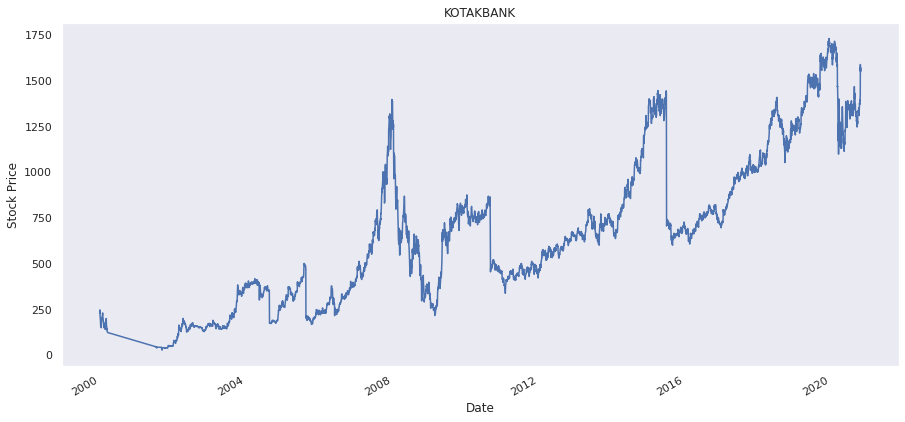

In [284]:
df.Close.plot(figsize=(15,7))
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('KOTAKBANK')
plt.grid()
plt.show()

In [285]:
df=df['2004-01-01':'2020-10-30']

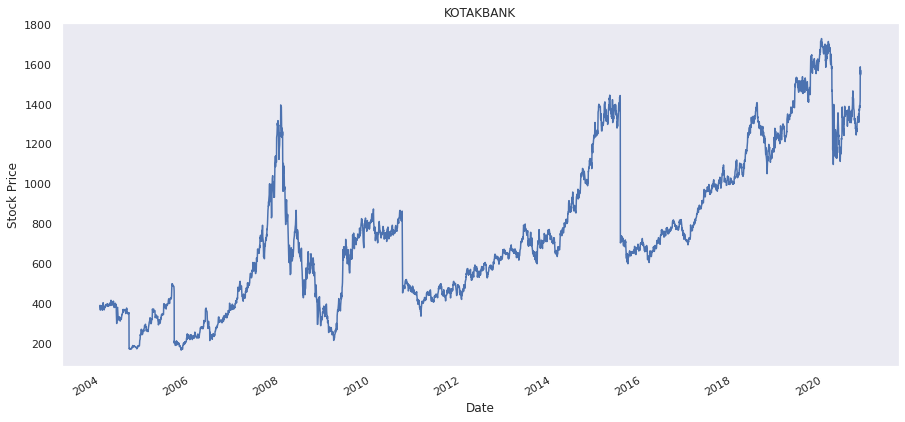

In [286]:
df.Close.plot(figsize=(15,7))
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('KOTAKBANK')
plt.grid()
plt.show()

In [287]:
import talib as ta
df['RSI']=ta.RSI(df['Close'].values,timeperiod=14)
df['DIFF1']=df['Close'].diff().values
df['DIFF2']=df['Close'].diff(2).values
df['DIFF3']=df['Close'].diff(3).values
df['DIFF4']=df['Close'].diff(4).values
print(df.head())
df.tail()

             Open    High    Low   Last  ...  DIFF1  DIFF2  DIFF3  DIFF4
Date                                     ...                            
2004-01-01  399.0  399.00  383.0  391.9  ...    NaN    NaN    NaN    NaN
2004-01-02  397.5  397.50  379.0  383.0  ...  -6.80    NaN    NaN    NaN
2004-01-05  388.0  390.90  370.0  373.0  ... -12.35 -19.15    NaN    NaN
2004-01-06  375.8  375.80  363.0  363.0  ...  -4.10 -16.45 -23.25    NaN
2004-01-07  350.0  376.95  350.0  370.1  ...   2.65  -1.45 -13.80  -20.6

[5 rows x 11 columns]


,Open,High,Low,Last,Close,Volume,RSI,DIFF1,DIFF2,DIFF3,DIFF4
Date,,,,,,,,,,,
2020-10-26,1399.0,1429.00,1347.35,1410.55,1416.90,8022562,64.565282,33.85,23.85,23.60,48.10
2020-10-27,1452.5,1602.00,1452.50,1582.70,1587.65,33167143,79.086428,170.75,204.60,194.60,194.35
2020-10-28,1575.0,1575.00,1541.00,1556.00,1551.35,7245009,72.302863,-36.30,134.45,168.30,158.30
2020-10-29,1532.0,1588.80,1525.00,1569.00,1570.90,7286144,73.615457,19.55,-16.75,154.00,187.85
2020-10-30,1574.0,1574.65,1518.60,1545.00,1547.40,4201984,69.360330,-23.50,-3.95,-40.25,130.50


In [288]:
df['Trends']=np.where(df.Close.shift(-1)>df.Close,1,0)
print(df.head(15))
df.tail(15)

             Open    High     Low   Last  ...  DIFF2  DIFF3  DIFF4  Trends
Date                                      ...                             
2004-01-01  399.0  399.00  383.00  391.9  ...    NaN    NaN    NaN       0
2004-01-02  397.5  397.50  379.00  383.0  ...    NaN    NaN    NaN       0
2004-01-05  388.0  390.90  370.00  373.0  ... -19.15    NaN    NaN       0
2004-01-06  375.8  375.80  363.00  363.0  ... -16.45 -23.25    NaN       1
2004-01-07  350.0  376.95  350.00  370.1  ...  -1.45 -13.80 -20.60       1
2004-01-08  377.9  388.00  374.00  388.0  ...  15.90  11.80  -0.55       1
2004-01-09  386.0  402.00  386.00  393.5  ...  20.75  23.40  19.30       0
2004-01-12  388.3  389.00  378.00  382.5  ...  -1.65  11.60  14.25       1
2004-01-13  390.0  390.00  379.80  385.0  ...  -6.20   1.30  14.55       0
2004-01-14  384.5  389.95  384.50  386.0  ...   2.60  -6.55   0.95       1
2004-01-15  395.0  397.50  385.00  391.5  ...   4.95   7.90  -1.25       0
2004-01-16  390.0  395.00

,Open,High,Low,Last,Close,Volume,RSI,DIFF1,DIFF2,DIFF3,DIFF4,Trends
Date,,,,,,,,,,,,
2020-10-12,1328.00,1358.20,1307.50,1312.85,1312.90,5175329,49.522672,-6.95,-7.20,-11.80,-25.35,1
2020-10-13,1319.65,1349.70,1307.20,1341.10,1344.95,4872154,56.427840,32.05,25.10,24.85,20.25,1
2020-10-14,1335.25,1358.00,1324.15,1355.00,1353.35,3358472,58.047671,8.40,40.45,33.50,33.25,0
2020-10-15,1353.35,1365.95,1301.25,1307.00,1309.55,3496590,48.022629,-43.80,-35.40,-3.35,-10.30,1
2020-10-16,1308.50,1343.30,1308.50,1336.45,1336.55,2358054,53.368905,27.00,-16.80,-8.40,23.65,1
2020-10-19,1350.00,1380.00,1333.50,1374.90,1376.70,3971028,59.963650,40.15,67.15,23.35,31.75,0
2020-10-20,1371.70,1386.00,1355.50,1369.10,1368.80,3228111,58.218980,-7.90,32.25,59.25,15.45,1
2020-10-21,1375.00,1400.00,1358.65,1392.25,1393.30,4280457,61.919412,24.50,16.60,56.75,83.75,0
2020-10-22,1388.00,1405.00,1377.55,1391.50,1393.05,3610102,61.859207,-0.25,24.25,16.35,56.50,0


In [289]:
print(df['Trends'].count())
print(df['Trends'].sum())

4181
2174


In [290]:
df.dropna(inplace=True)
predictor_list=['RSI','DIFF1','DIFF2','DIFF3','DIFF4']
X=df[predictor_list]
y=df['Trends']
y.tail()

Date
2020-10-26    1
2020-10-27    0
2020-10-28    1
2020-10-29    0
2020-10-30    0
Name: Trends, dtype: int64

In [291]:
print(df['Trends'].count())
df['Trends'].sum()

4167


2168

In [292]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)


(3333, 5) (834, 5)
(3333,) (834,)


In [293]:
print(X_train,X_test)
print(y_train,y_test)

                  RSI  DIFF1  DIFF2  DIFF3  DIFF4
Date                                             
2020-01-02  49.741388  -2.50 -12.80 -18.85 -14.05
2019-05-06  68.063975  -7.40   4.05  23.85  31.15
2016-12-06  36.486365   4.20  10.45 -10.95 -21.45
2019-03-11  49.242285  10.65  12.35   8.25   9.10
2019-04-16  70.476185  12.55  42.95  43.20  36.50
...               ...    ...    ...    ...    ...
2009-11-11  60.631459  22.45   9.80  49.95  95.15
2015-12-24  59.550285  -1.20   3.15  -4.55  -1.10
2009-06-09  64.768922  37.85   5.45   0.90  16.95
2014-06-18  71.649055  23.00  29.80  43.30  26.55
2007-02-06  76.065300   2.50  20.50  44.55  41.70

[3333 rows x 5 columns]                   RSI  DIFF1  DIFF2  DIFF3  DIFF4
Date                                             
2005-10-03  28.639965   0.70  -3.65  -3.20   0.65
2004-03-30  47.487975  -3.40  -8.45  -4.80  -9.25
2008-01-08  58.099341 -59.25 -50.35 -19.10 -68.60
2014-08-05  56.059885   0.20  12.65 -15.75 -36.30
2010-12-06  47.405880  -5

In [294]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=20,min_samples_leaf=5)
model=clf.fit(X_train,y_train)

In [295]:
print(accuracy_score(y_test,model.predict(X_test),normalize=True)*100)


52.038369304556355


In [296]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,shuffle=False)
kf.split(X)

<generator object _BaseKFold.split at 0x7f2b7d3ec4c0>

In [297]:
from sklearn.metrics import accuracy_score
accuracy_model=[]
for train_index,test_index in kf.split(X):
  X_train,X_test=X.iloc[train_index],X.iloc[test_index]
  y_train,y_test=y[train_index],y[test_index]
  model=clf.fit(X_train,y_train)
  accuracy_model.append(accuracy_score(y_test,model.predict(X_test),normalize=True)*100)
print(accuracy_model)

[51.91846522781775, 49.040767386091126, 51.50060024009604, 52.22088835534213, 50.540216086434576]


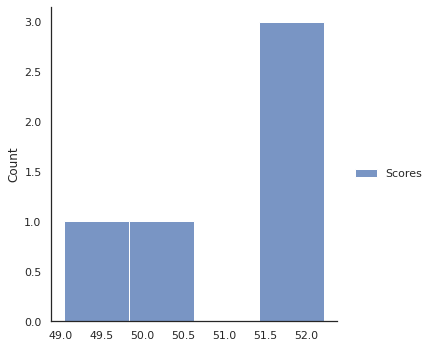

In [298]:
scores = pd.DataFrame(accuracy_model,columns=['Scores'])
sns.set(style="white", rc={"lines.linewidth": 3})
sns.displot(scores)
plt.show()
sns.set()

In [299]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("CONFUSION MATRIX \n",cm)

CONFUSION MATRIX 
 [[155 245]
 [167 266]]


In [300]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.48      0.39      0.43       400
           1       0.52      0.61      0.56       433

    accuracy                           0.51       833
   macro avg       0.50      0.50      0.50       833
weighted avg       0.50      0.51      0.50       833



In [325]:
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [326]:


# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
	cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
	scores_NB = cross_val_score(model_NB, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores_NB

# create dataset


>1 mean=0.4968 se=0.005
>2 mean=0.4968 se=0.005
>3 mean=0.4968 se=0.005
>4 mean=0.4968 se=0.005
>5 mean=0.4968 se=0.005
>6 mean=0.4968 se=0.005
>7 mean=0.4968 se=0.005
>8 mean=0.4968 se=0.005
>9 mean=0.4968 se=0.005
>10 mean=0.4968 se=0.005
>11 mean=0.4968 se=0.005
>12 mean=0.4968 se=0.005
>13 mean=0.4968 se=0.005
>14 mean=0.4968 se=0.005
>15 mean=0.4968 se=0.005


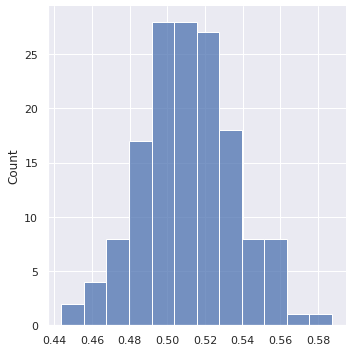

In [327]:
repeats = range(1,16)
results = list()
for r in repeats:
	scores_NB = evaluate_model(X, y, r)
	results.append(scores_NB)
sns.displot(scores_NB)

In [328]:
y_pred_NB = model_NB.predict(X_test)
cm = confusion_matrix(y_test, y_pred_NB)
print(cm)
report=classification_report(y_test,y_pred_NB)
print(report)

[[ 76 324]
 [ 86 347]]
              precision    recall  f1-score   support

           0       0.47      0.19      0.27       400
           1       0.52      0.80      0.63       433

    accuracy                           0.51       833
   macro avg       0.49      0.50      0.45       833
weighted avg       0.49      0.51      0.46       833



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


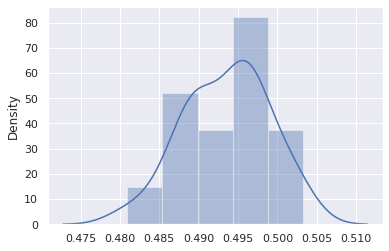

In [330]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
%matplotlib inline
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
sns.distplot(k_scores)

In [332]:
y_pred_knn= classifier_knearest.predict(X_test)
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)
report=classification_report(y_test,y_pred_knn)
print(report)

[[206 194]
 [217 216]]
              precision    recall  f1-score   support

           0       0.49      0.52      0.50       400
           1       0.53      0.50      0.51       433

    accuracy                           0.51       833
   macro avg       0.51      0.51      0.51       833
weighted avg       0.51      0.51      0.51       833

